Importation of modules and functions
===

In [1]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import datetime
import random
import warnings

# Functions
sys.path.insert(0, './implementations/')
from implementations import *
from preprocessing import *
from pca import *
from plot import *
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)

Training data loading
===

In [2]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")

Splitting data and jets
===

In [3]:
# Splitting data
X_train, y_train, X_test, y_test = split_data(data_raw, labels_raw)

# Get feature jet_num
jets = X_train[:,22]
jets_t = X_test[:,22]

# Get index of samples with appropriate jet
idx_jet0 = np.argwhere(jets == 0)[:,0]
idx_jet1 = np.argwhere(jets == 1)[:,0]
idx_jet2 = np.argwhere(jets >= 2)[:,0]

idx_jet0_t = np.argwhere(jets_t == 0)[:,0]
idx_jet1_t = np.argwhere(jets_t == 1)[:,0]
idx_jet2_t = np.argwhere(jets_t >= 2)[:,0]

In [4]:
# Remove jet_num feature as it will be constant after separation
X_train = np.delete(X_train, 22, axis=1)
X_test = np.delete(X_test, 22, axis=1)

# Split data relative to jets
data_tr_j0 = X_train[idx_jet0,:]
data_tr_j1 = X_train[idx_jet1,:]
data_tr_j2 = X_train[idx_jet2,:]

data_ts_j0 = X_test[idx_jet0_t,:]
data_ts_j1 = X_test[idx_jet1_t,:]
data_ts_j2 = X_test[idx_jet2_t,:]

# Split labels relative to jets
lab_j0 = y_train[idx_jet0]
lab_j1 = y_train[idx_jet1]
lab_j2 = y_train[idx_jet2]

lab_j0_t = y_test[idx_jet0_t]
lab_j1_t = y_test[idx_jet1_t]
lab_j2_t = y_test[idx_jet2_t]

Data filtering and normalization
===

In [5]:
# Filtering features, missing values and outliers
data_j0, data_j0_t = process_data(data_tr_j0, data_ts_j0)
data_j1, data_j1_t = process_data(data_tr_j1, data_ts_j1)
data_j2, data_j2_t = process_data(data_tr_j2, data_ts_j2)

Filtering features
Finding and replacing outliers by column mean
Replacing NaN points with feature mean value
Standardizing the data
Filtering features
Finding and replacing outliers by column mean
Replacing NaN points with feature mean value
Standardizing the data
Filtering features
Finding and replacing outliers by column mean
Replacing NaN points with feature mean value
Standardizing the data


In [22]:
# Transforming data using polynomials, log and interaction terms
y_j0, tx_j0, y_j0_t, tx_j0_t = transform_data(data_j0, data_j0_t, lab_j0, lab_j0_t, 6)
y_j1, tx_j1, y_j1_t, tx_j1_t = transform_data(data_j1, data_j1_t, lab_j1, lab_j1_t, log = False)
y_j2, tx_j2, y_j2_t, tx_j2_t = transform_data(data_j2, data_j2_t, lab_j2, lab_j2_t)

Building polynomial of degree 6
Building the interactive terms
Taking the log value of the data
Building the interactive terms or order three
Performing PCA and keeping feature explaining 1 of the variance
Reducing the number of PCA to 578
Adding a columns of ones to the dataset
Building polynomial of degree 4
Building the interactive terms
Building the interactive terms or order three
Performing PCA and keeping feature explaining 1 of the variance
Reducing the number of PCA to 310
Adding a columns of ones to the dataset
Building polynomial of degree 4
Building the interactive terms
Taking the log value of the data
Building the interactive terms or order three
Performing PCA and keeping feature explaining 1 of the variance
Reducing the number of PCA to 1072
Adding a columns of ones to the dataset


In [ ]:
initial_w = np.zeros(tx_j0.shape[1])
losses, losses_t, acc, acc_t, w_0 = logistic_hessian(y_j0, tx_j0, y_j0_t, tx_j0_t, initial_w, gamma = 0.07, lam = 1, max_iters = 100)

initial_w = np.zeros(tx_j1.shape[1])
losses, losses_t, acc, acc_t, w_1 = logistic_hessian(y_j1, tx_j1, y_j1_t, tx_j1_t, initial_w, gamma = 1, lam = 100, max_iters = 100)

initial_w = np.zeros(tx_j2.shape[1])
losses, losses_t, acc, acc_t, w_2 = logistic_hessian(y_j2, tx_j2, y_j2_t, tx_j2_t, initial_w, gamma = 1, lam = 0.001, max_iters = 100)

25/100	 train acc : 0.8502558712761032 	 | test acc : 0.8457728864432216
50/100	 train acc : 0.8499055340765487 	 | test acc : 0.8471735867933967
75/100	 train acc : 0.8498679979480249 	 | test acc : 0.8477738869434718
100/100	 train acc : 0.8498429738623425 	 | test acc : 0.847823911955978
25/100	 train acc : 0.7965636847624425 	 | test acc : 0.7969021145317823
50/100	 train acc : 0.8123900943776721 	 | test acc : 0.8111061122180089
75/100	 train acc : 0.8132935387593773 	 | test acc : 0.8116202840799537
100/100	 train acc : 0.8132290070178269 	 | test acc : 0.8116202840799537
25/100	 train acc : 0.8330923362941541 	 | test acc : 0.8246488132309183


0.8504936000900867


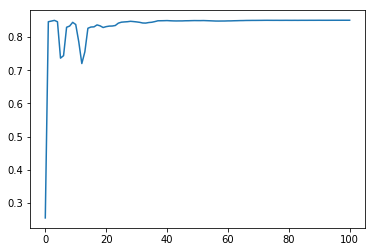

In [29]:
plt.plot(acc)
print(np.max(acc))

Grid search for best lambda and learning rate
===

Jet num = 0
==

In [ ]:
num_iter = 100
lr = np.arange(0.05,0.1,0.005)
lamb = np.logspace(-3,3,7)

initial_w = np.zeros(tx_j0.shape[1])

best_gamma = 0
best_lambda = 0
best_acc = 0
grid_acc = np.zeros([len(lr),len(lamb)])

# Performing grid search for lambda and gamma(learning rate)
for g in range(len(lr)):
    for l in range(len(lamb)):
        grid_acc[g,l] = Grid_Search_logistic(y_j0, tx_j0, y_j0_t, tx_j0_t, initial_w, gamma=lr[g], lam=lamb[l], max_iters = num_iter, momentum = 0)
        print("gamma: {0} \t| lambda: {1} \t| test acc: {2}".format(lr[g],lamb[l], grid_acc[g,l]))
        if (grid_acc[g,l] > best_acc):
            best_acc = grid_acc[g,l]
            best_gamma = lr[g]
            best_lambda = lamb[l]

file = "grid_search_logistic_jet0.npy"
np.save(file, grid_acc)

Jet num = 1
==

In [ ]:
num_iter = 100
lr = np.arange(0.05,0.1,0.005)
lamb = np.logspace(-3,3,7)

initial_w = np.zeros(tx_j1.shape[1])

best_gamma = 0
best_lambda = 0
best_acc = 0
grid_acc = np.zeros([len(lr),len(lamb)])

# Performing grid search for lambda and gamma(learning rate)
for g in range(len(lr)):
    for l in range(len(lamb)):
        grid_acc[g,l] = Grid_Search_logistic(y_j1, tx_j1, y_j1_t, tx_j1_t, initial_w, gamma=lr[g], lam=lamb[l], max_iters = num_iter, momentum = 0)
        print("gamma: {0} \t| lambda: {1} \t| test acc: {2}".format(lr[g],lamb[l], grid_acc[g,l]))
        if (grid_acc[g,l] > best_acc):
            best_acc = grid_acc[g,l]
            best_gamma = lr[g]
            best_lambda = lamb[l]

file = "grid_search_logistic_jet1.npy"
np.save(file, grid_acc)

Jet num > 1
==

In [ ]:
num_iter = 100
lr = np.arange(0.05,0.1,0.005)
lamb = np.logspace(-3,3,7)

initial_w = np.zeros(tx_j2.shape[1])

best_gamma = 0
best_lambda = 0
best_acc = 0
grid_acc = np.zeros([len(lr),len(lamb)])

# Performing grid search for lambda and gamma(learning rate)
for g in range(len(lr)):
    for l in range(len(lamb)):
        grid_acc[g,l] = Grid_Search_logistic(y_j2, tx_j2, y_j2_t, tx_j2_t, initial_w, gamma=lr[g], lam=lamb[l], max_iters = num_iter, momentum = 0)
        print("gamma: {0} \t| lambda: {1} \t| test acc: {2}".format(lr[g],lamb[l], grid_acc[g,l]))
        if (grid_acc[g,l] > best_acc):
            best_acc = grid_acc[g,l]
            best_gamma = lr[g]
            best_lambda = lamb[l]

file = "grid_search_logistic_jet2.npy"
np.save(file, grid_acc)


Heat maps for the grid search
==

In [8]:
#initalizing the parameters:
lr = np.arange(0.05,0.1,0.005)
lamb = np.logspace(-3,3,7)

Text(34,0.5,'gamma')

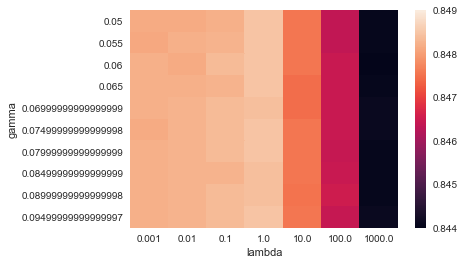

In [9]:
file = "grid_search/grid_search_logistic_jet0.npy"
grid_acc = np.load(file)
import seaborn as sns; sns.set()
ax = sns.heatmap(grid_acc,xticklabels=lamb, yticklabels=lr,vmin= 0.844, vmax=0.849)
ax.set_xlabel('lambda')
ax.set_ylabel('gamma')

Text(34,0.5,'gamma')

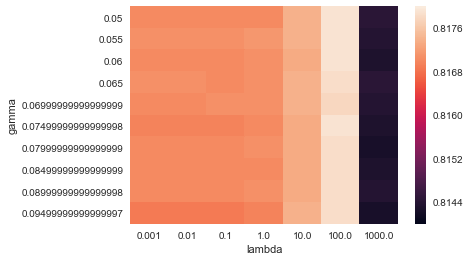

In [10]:
file = "grid_search/grid_search_logistic_jet1.npy"
grid_acc = np.load(file)
import seaborn as sns; sns.set()
ax = sns.heatmap(grid_acc,xticklabels=lamb, yticklabels=lr,vmin= 0.814, vmax=0.818)
ax.set_xlabel('lambda')
ax.set_ylabel('gamma')

Text(34,0.5,'gamma')

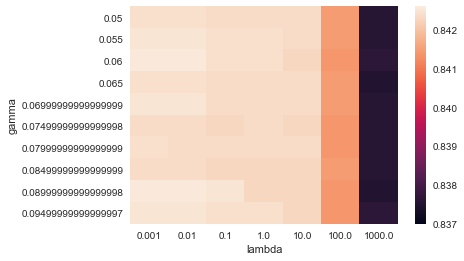

In [11]:
file = "grid_search/grid_search_logistic_jet2.npy"
grid_acc = np.load(file)
import seaborn as sns; sns.set()
ax = sns.heatmap(grid_acc,xticklabels=lamb, yticklabels=lr,vmin= 0.837, vmax=0.8426)
ax.set_xlabel('lambda')
ax.set_ylabel('gamma')

Grid search for best alpha for momentum
===

Jet num = 0
==

In [ ]:
num_iter = 100
mom = np.arange(0,1,0.1)

initial_w = np.zeros(tx_j0.shape[1])

best_mom = 0
best_acc = 0
grid_acc = np.zeros(mom.shape)

# Performing grid search for momentum
for m in range(len(mom)):
    grid_acc[m] = Grid_Search_logistic(y_j0, tx_j0, y_j0_t, tx_j0_t, initial_w, gamma=0.075, lam=1, max_iters = num_iter, momentum = mom[m])
    print("momentum alpha: {0} \t| test acc: {1}".format(mom[m], grid_acc[m]))
    if (grid_acc[m] > best_acc):
        best_acc = grid_acc[m]
        best_mom = mom[m]

file = "grid_search_logistic_jet0_momentum.npy"
np.save(file, grid_acc)

Jet num = 1
==

In [ ]:
num_iter = 100
mom = np.arange(0.1,0.9,0.1)

initial_w = np.zeros(tx_j1.shape[1])

best_mom = 0
best_acc = 0
grid_acc = np.zeros(mom.shape)

# Performing grid search for momentum
for m in range(len(mom)):
    grid_acc[m] = Grid_Search_logistic(y_j1, tx_j1, y_j1_t, tx_j1_t, initial_w, gamma=0.075, lam=100, max_iters = num_iter, momentum = mom[m])
    print("momentum alpha: {0} \t| test acc: {1}".format(mom[m], grid_acc[m]))
    if (grid_acc[m] > best_acc):
        best_acc = grid_acc[m]
        best_mom = mom[m]

file = "grid_search_logistic_jet1_momentum.npy"
np.save(file, grid_acc)

Jet num > 1
==

In [ ]:
num_iter = 100
mom = np.arange(0.1,0.9,0.1)

initial_w = np.zeros(tx_j2.shape[1])

best_mom = 0
best_acc = 0
grid_acc = np.zeros(mom.shape)

# Performing grid search for momentum
for m in range(len(mom)):
    grid_acc[m] = Grid_Search_logistic(y_j2, tx_j2, y_j2_t, tx_j2_t, initial_w, gamma=0.07, lam=0.001, max_iters = num_iter, momentum = mom[m])
    print("momentum alpha: {0} \t| test acc: {1}".format(mom[m], grid_acc[m]))
    if (grid_acc[m] > best_acc):
        best_acc = grid_acc[m]
        best_mom = mom[m]

file = "grid_search_logistic_jet2_momentum.npy"
np.save(file, grid_acc)